In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Loading the dataset
file_path = 'marketing_campaign.xlsx'
data = pd.read_excel(file_path)

# Display the first 5 rows of the dataset
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [3]:
# Fill missing values with column mean
data.fillna(data.Income.mean(), inplace=True)

In [4]:
data.Income.isnull().sum()

0

In [5]:
# Check for Duplicate values
data.duplicated().sum()

0

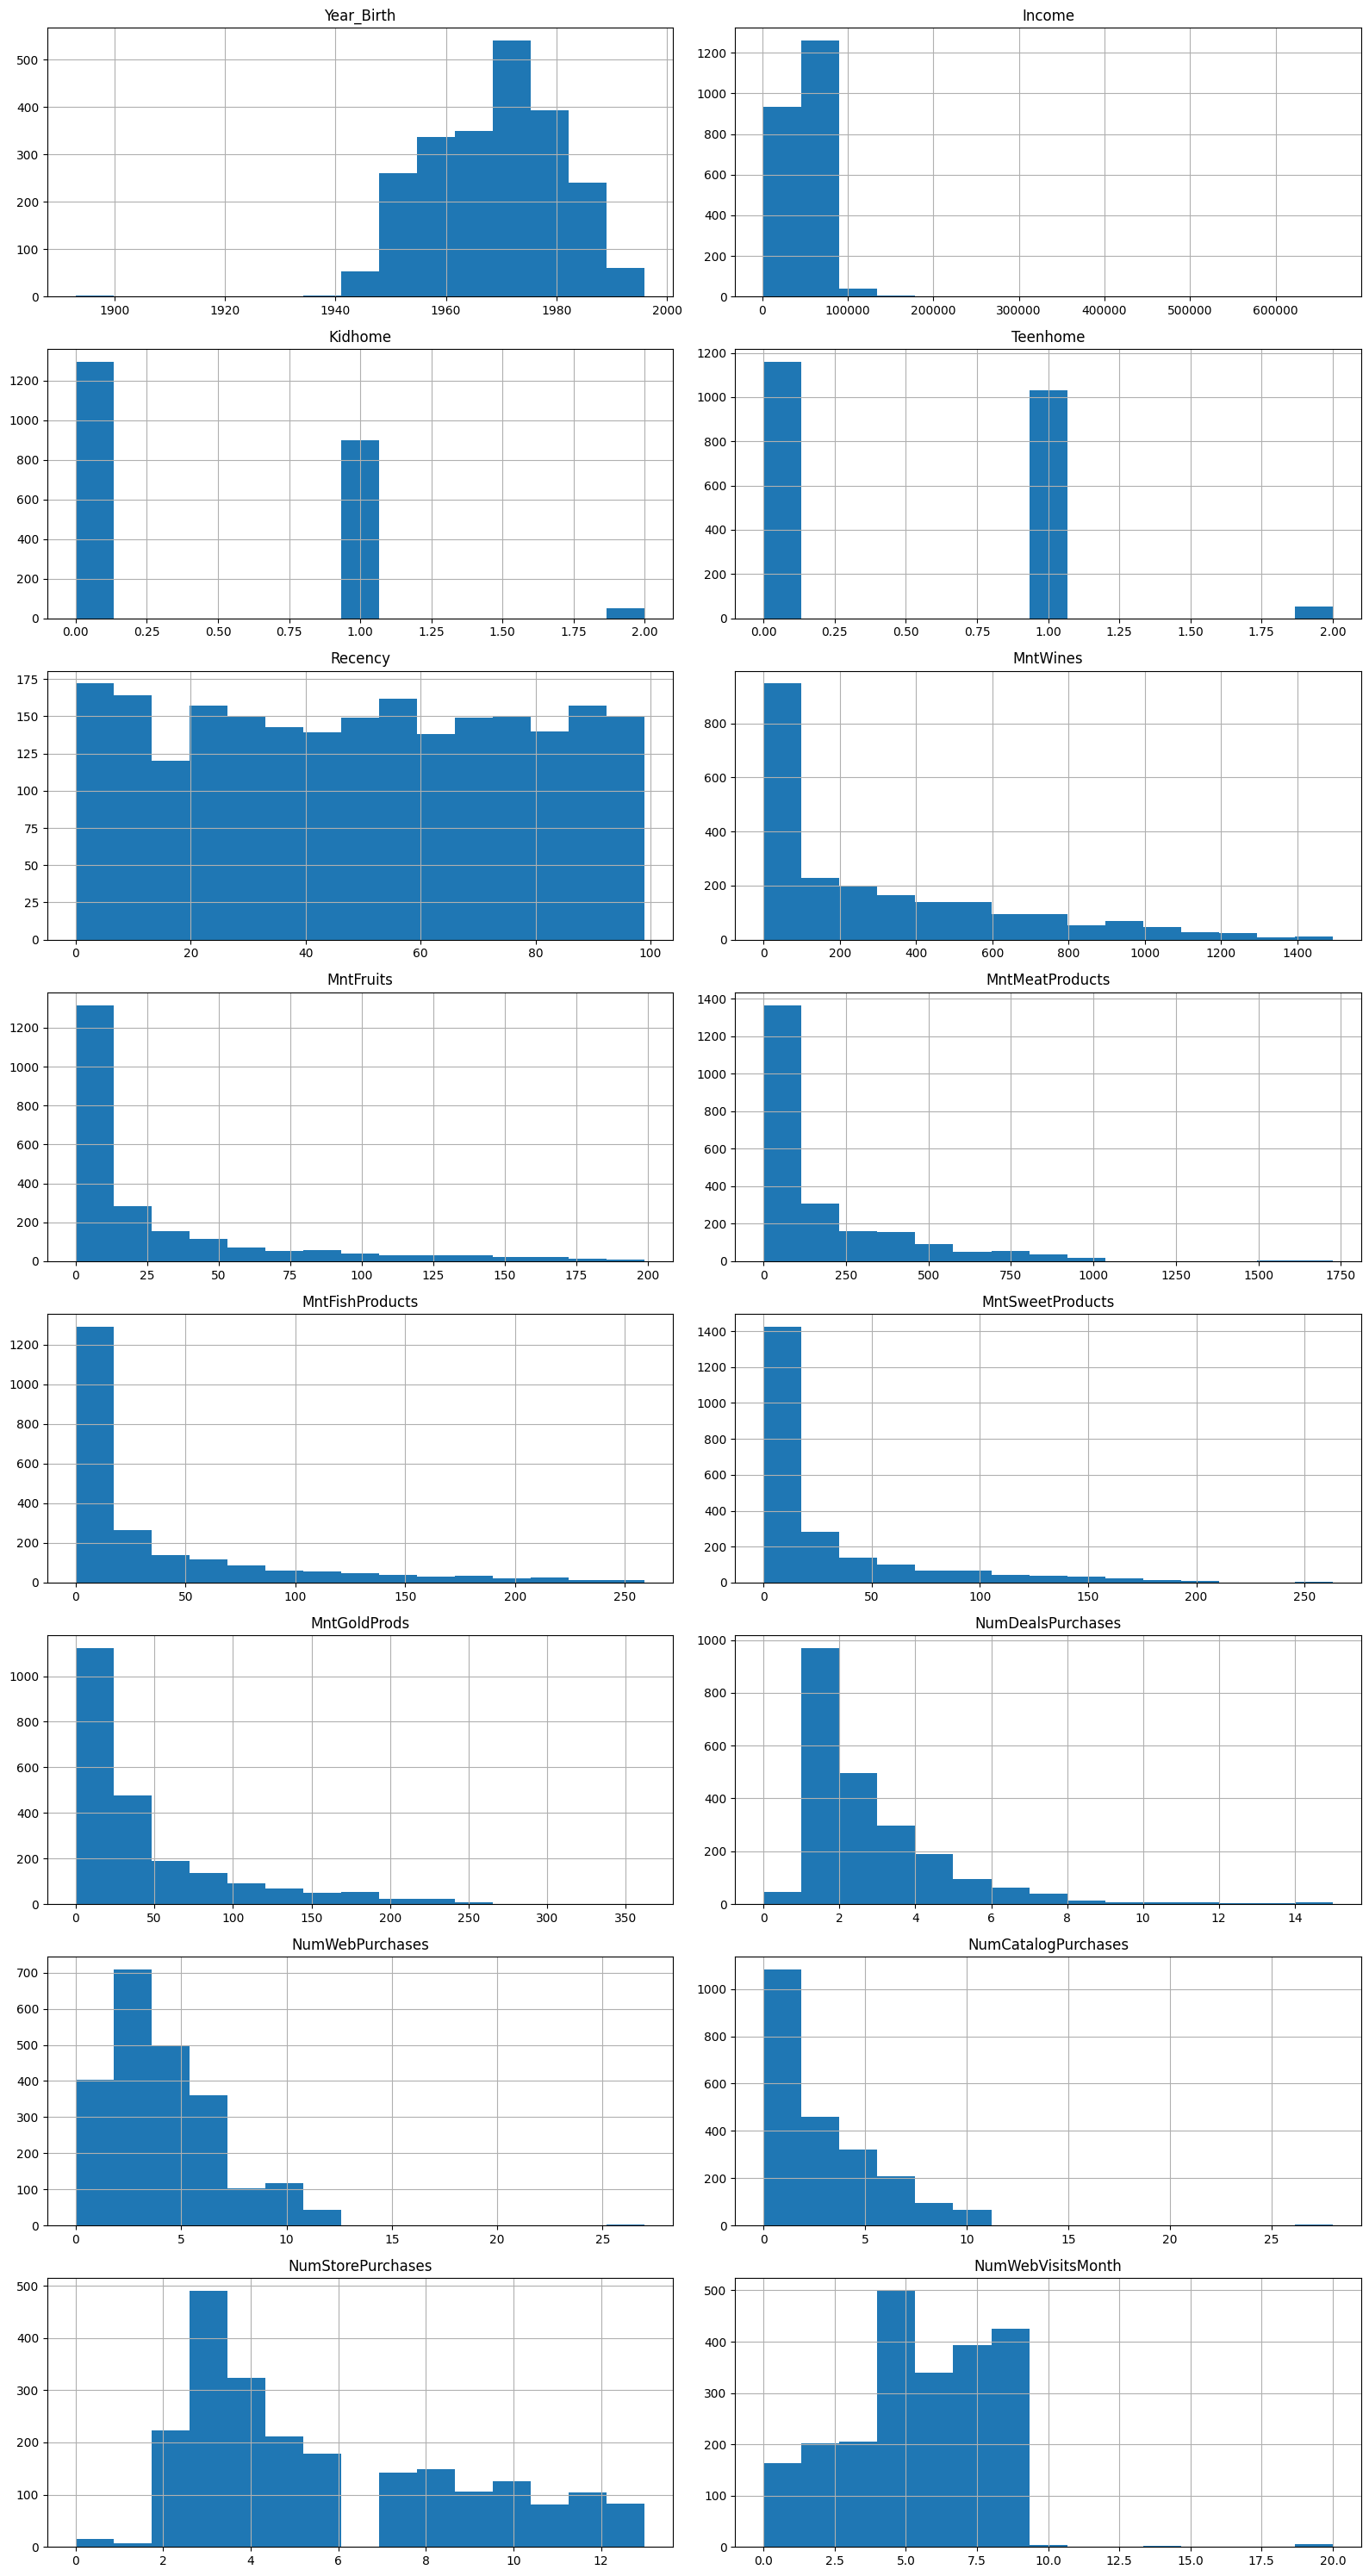

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of numerical features
num_col = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 
            'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
            'NumWebVisitsMonth']

data[num_col].hist(bins=15, figsize=(16, 30), layout=(8, 2))
plt.tight_layout()
plt.show()

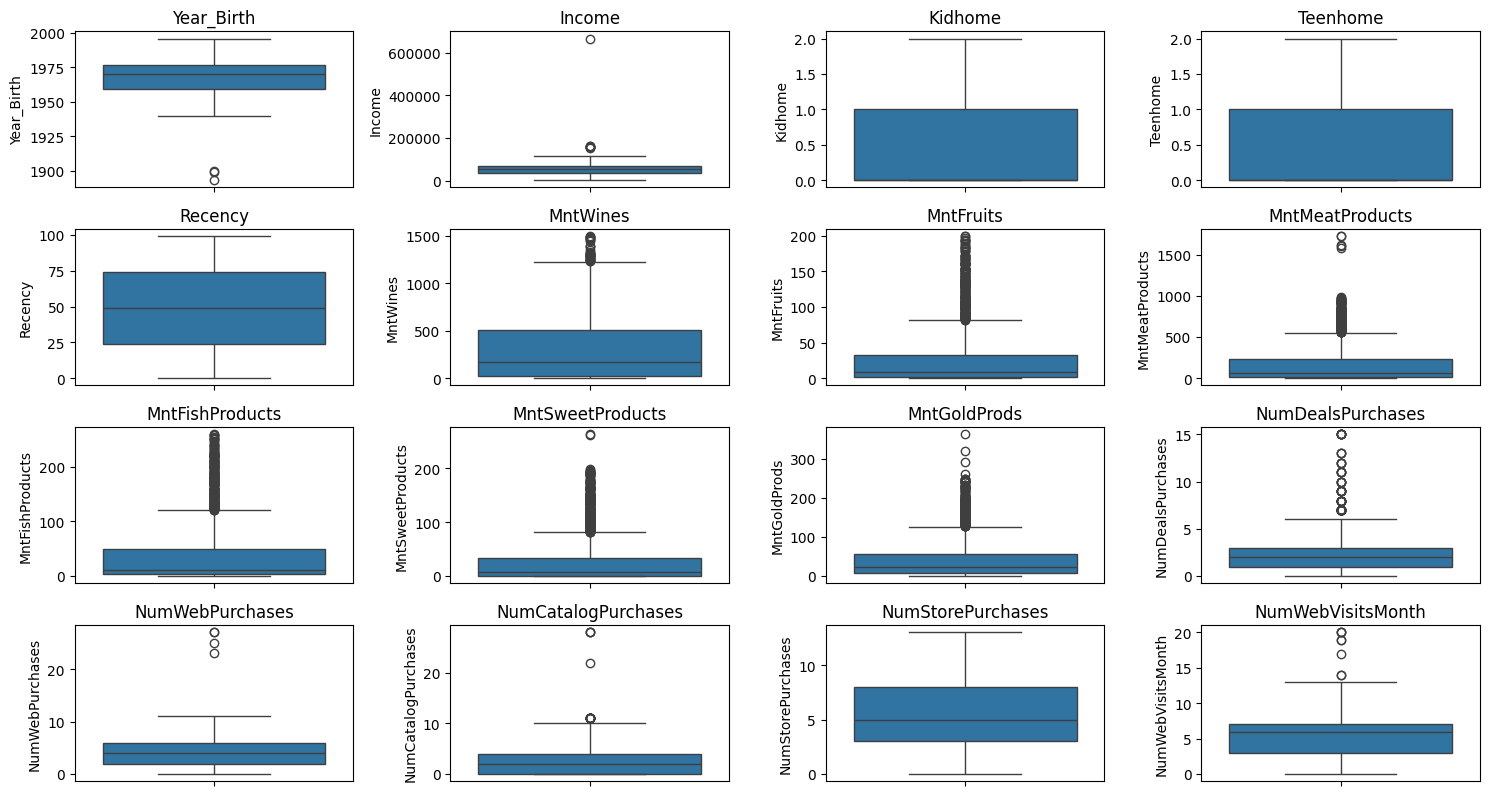

In [7]:
# Boxplots for numerical features to identify outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_col):
    plt.subplot(len(num_col)//4 + 1, 4, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

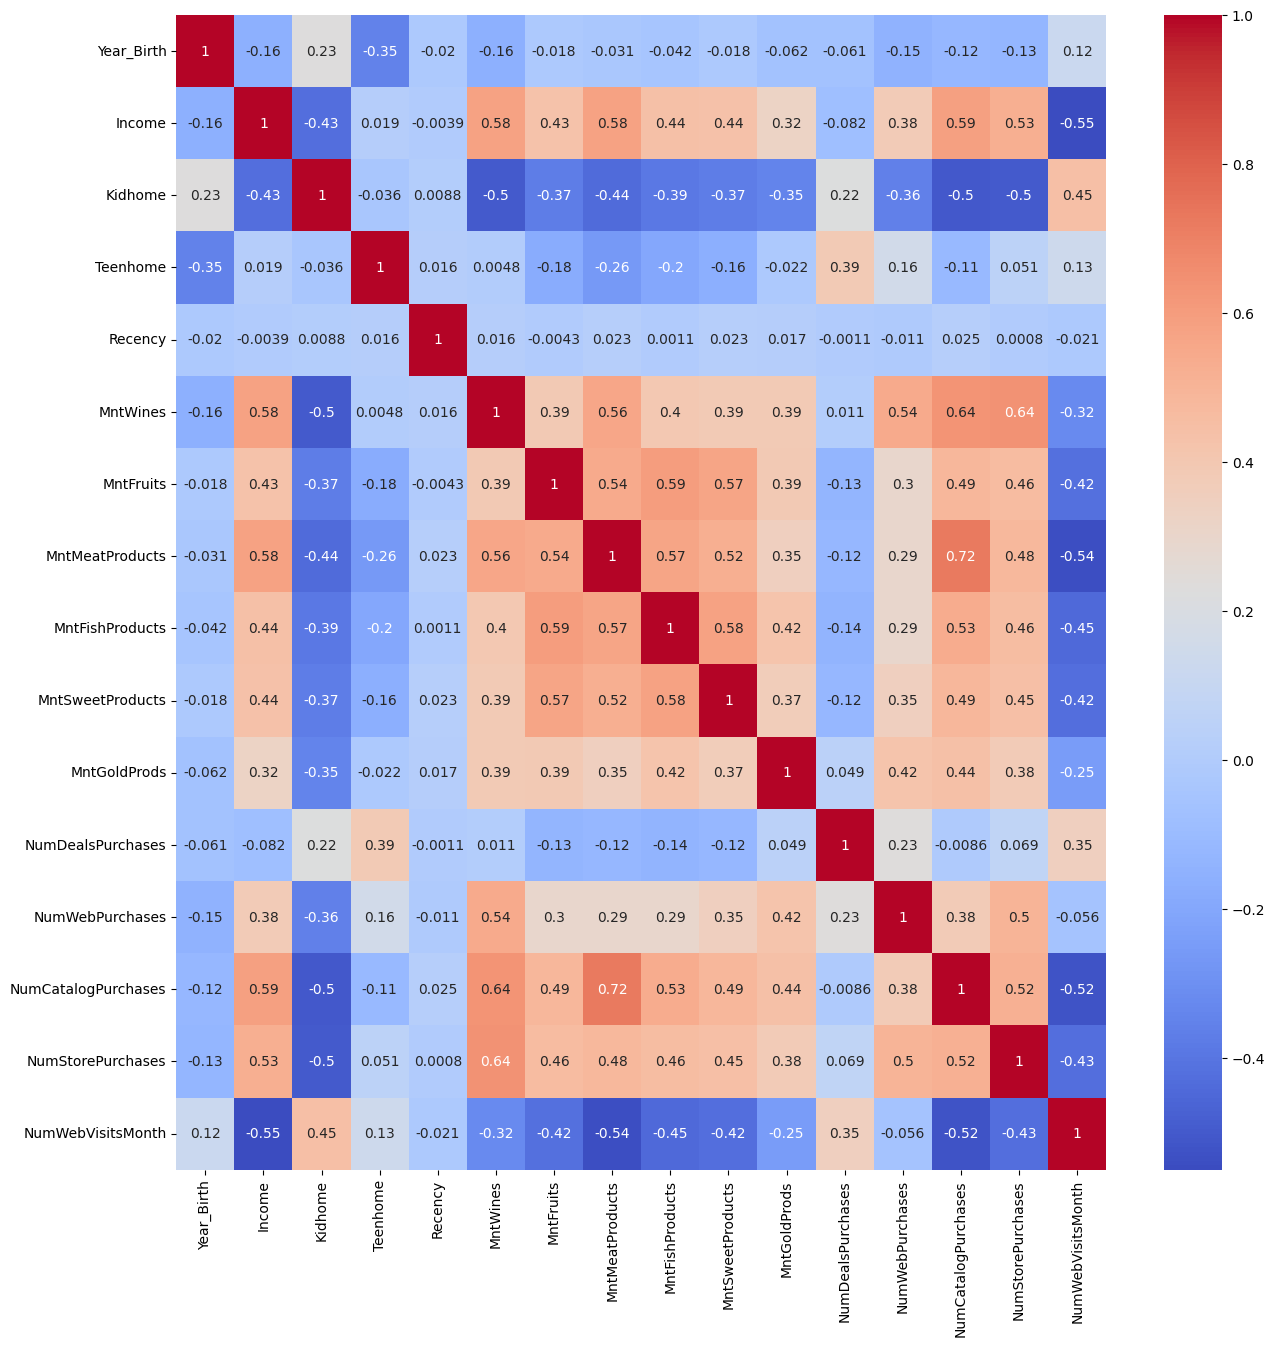

In [8]:
# Correlation matrix to understand relationships
plt.figure(figsize=(15, 15))
corr_matrix = data[num_col].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [9]:
import numpy as np

# Identify numerical columns automatically
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Identify categorical columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Standardize the numerical columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[num_cols])

# Convert scaled data back to DataFrame for easier manipulation
data_scaled = pd.DataFrame(data_scaled, columns=num_cols)

# Combine scaled numerical data with categorical data
data_combined = pd.concat([data_scaled, data[cat_cols]], axis=1)

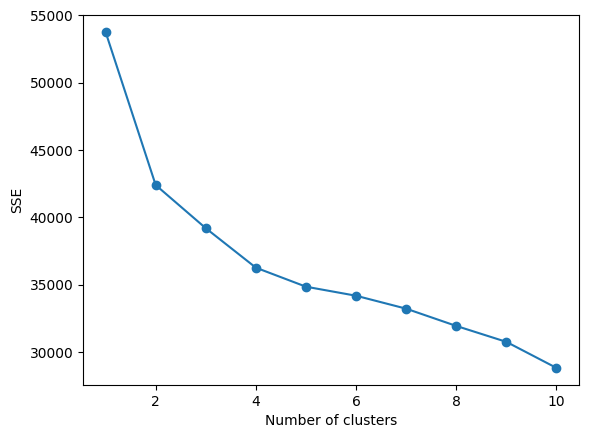

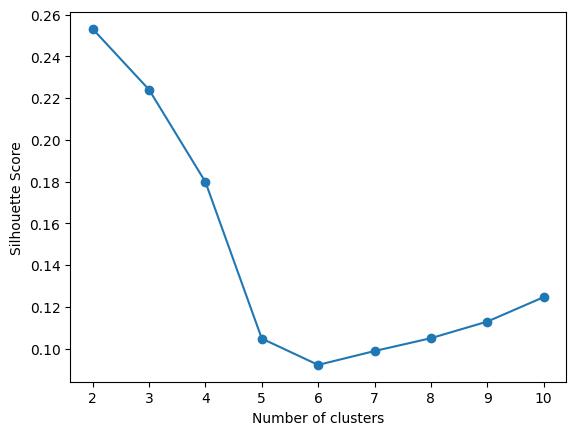

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

C:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


C:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.561464362648773


C:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.4857596147013469


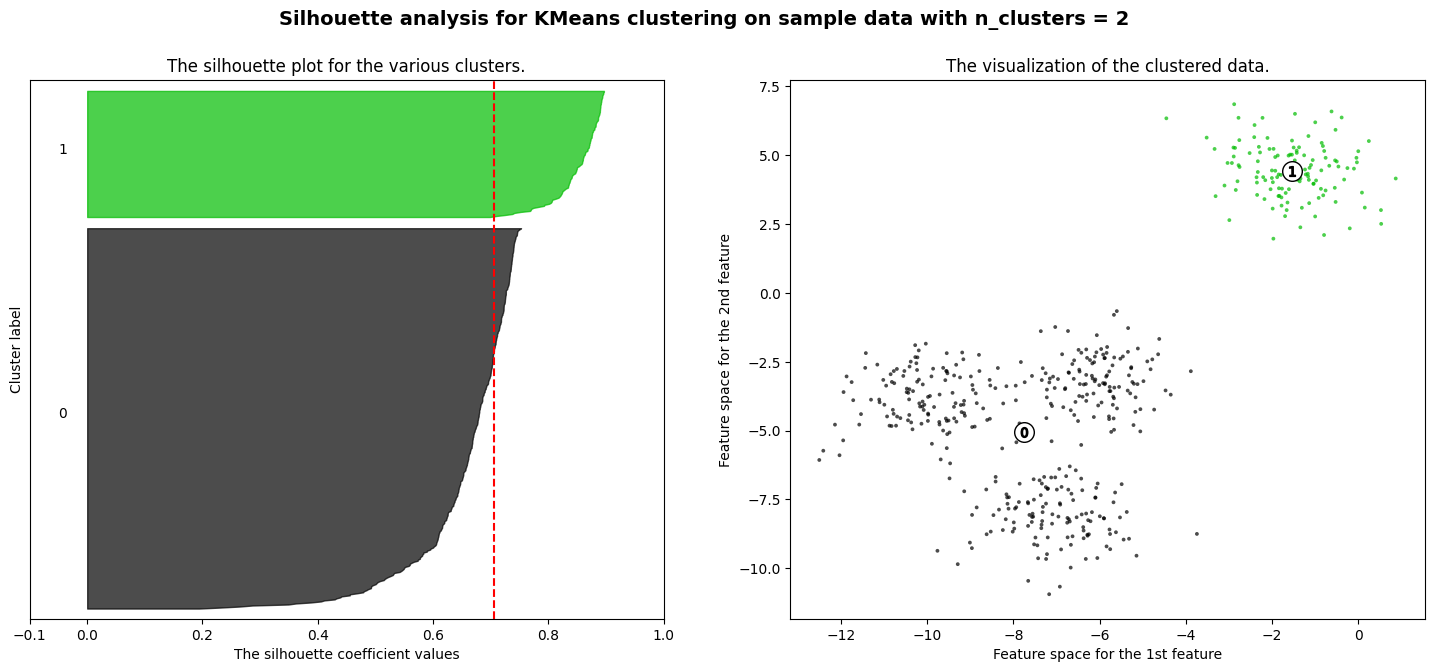

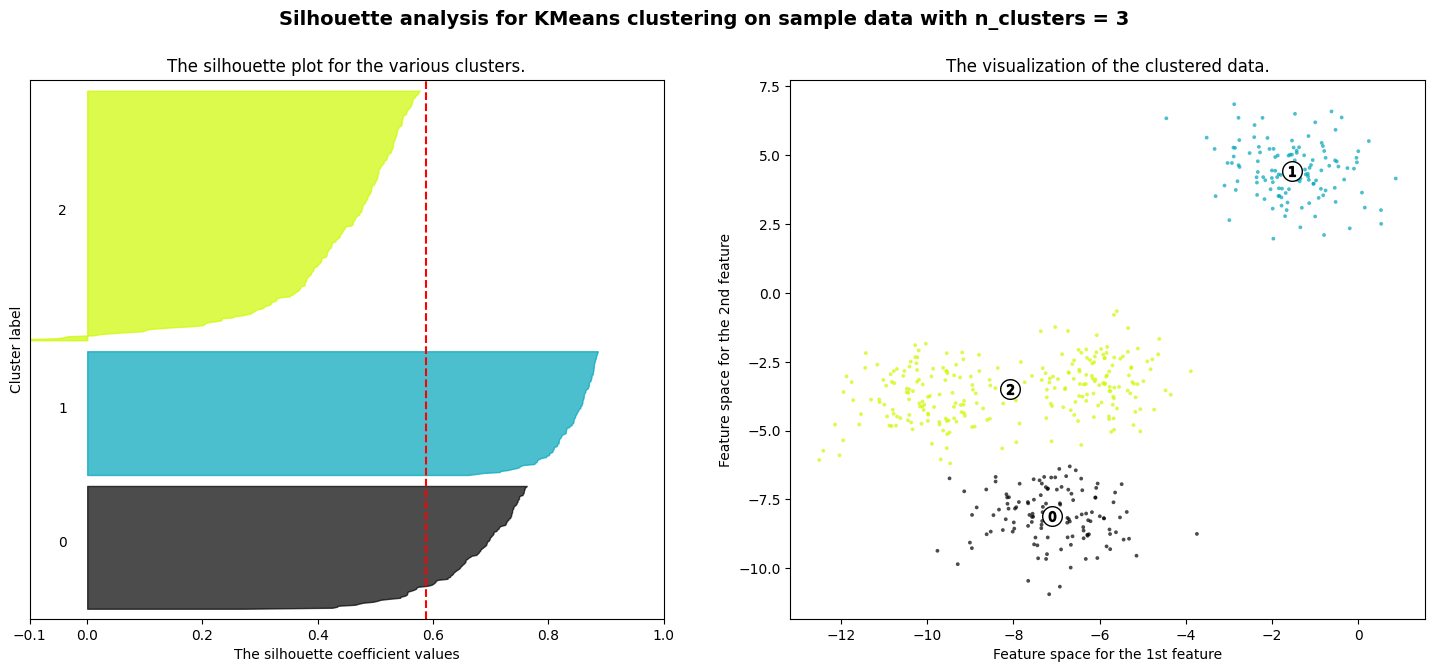

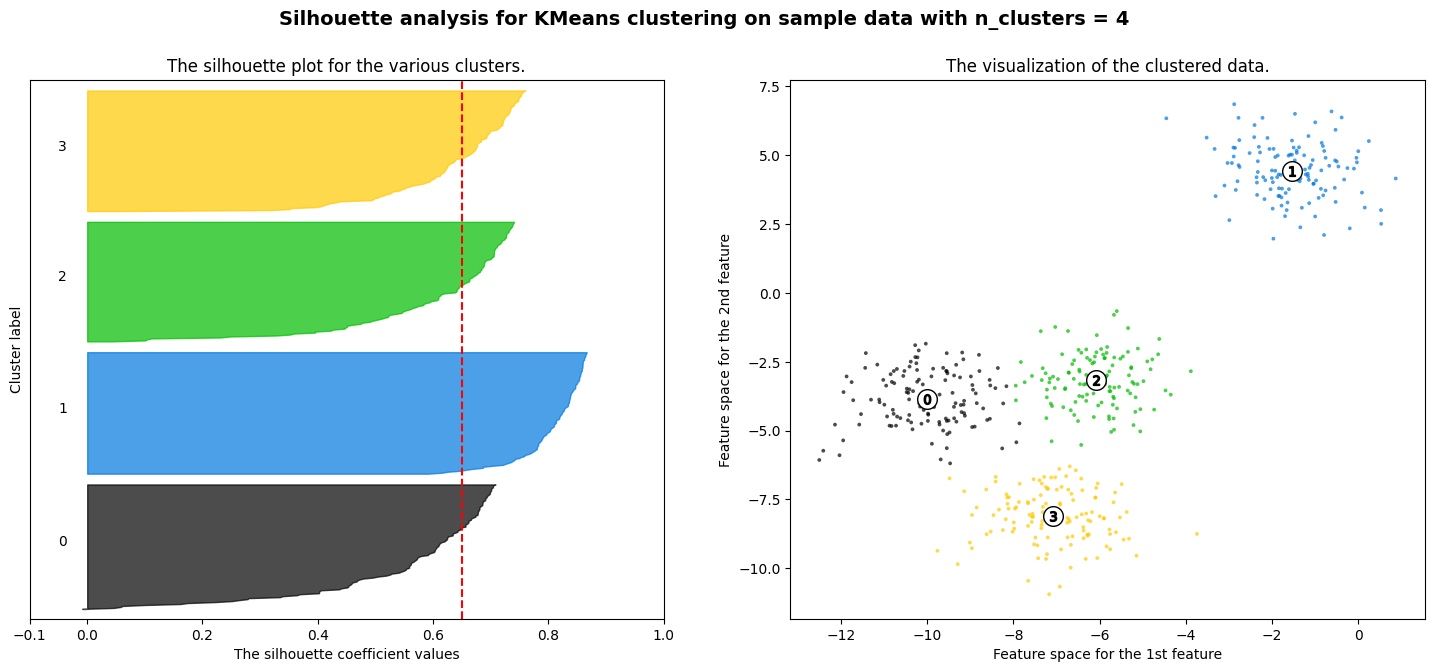

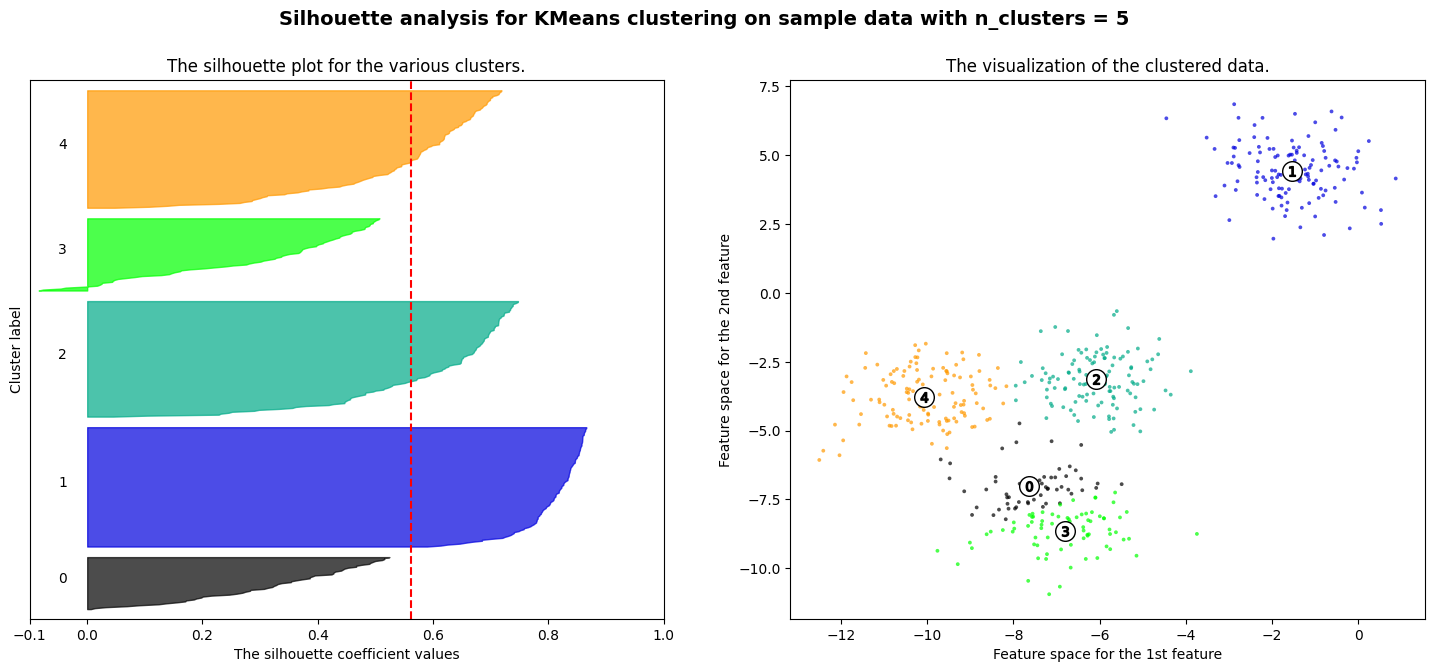

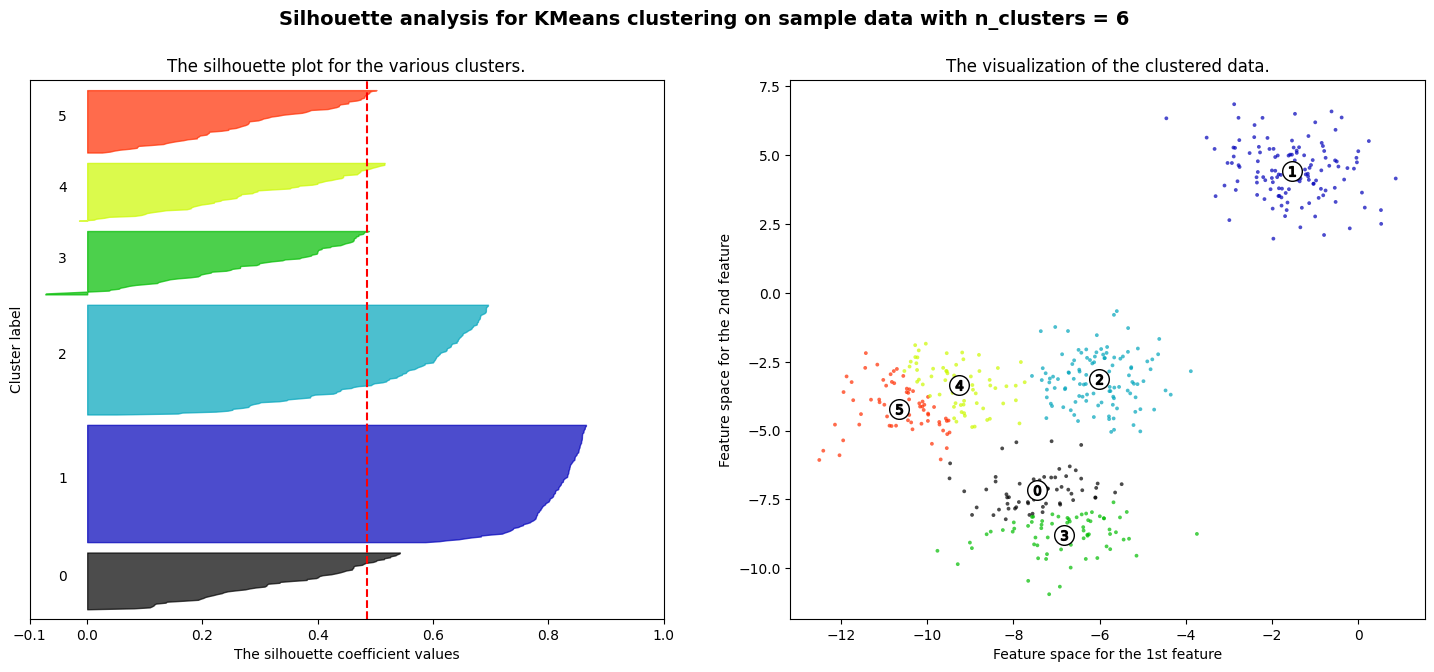

In [19]:
import os
os.environ["OMP_NUM_THREADS"] = '2'
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [12]:
# Based on the elbow method and silhouette score, choose the optimal number of clusters
optimal_clusters = 2 

# Fit the KMeans model
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data_combined['Cluster'] = kmeans.fit_predict(data_scaled)

In [13]:
# Fit KMeans to the data
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(data_scaled)

# Calculate the variance explained by each feature
centroids = kmeans.cluster_centers_
feature_importance = np.var(centroids, axis=0)

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': num_cols,
    'Importance': feature_importance
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 8 important features
top_features = feature_importance_df.head(5)['Feature'].tolist()

# Print the top features
print("Top 5 important features:")
print(top_features)

Top 5 important features:
['NumCatalogPurchases', 'MntWines', 'MntMeatProducts', 'NumStorePurchases', 'Income']


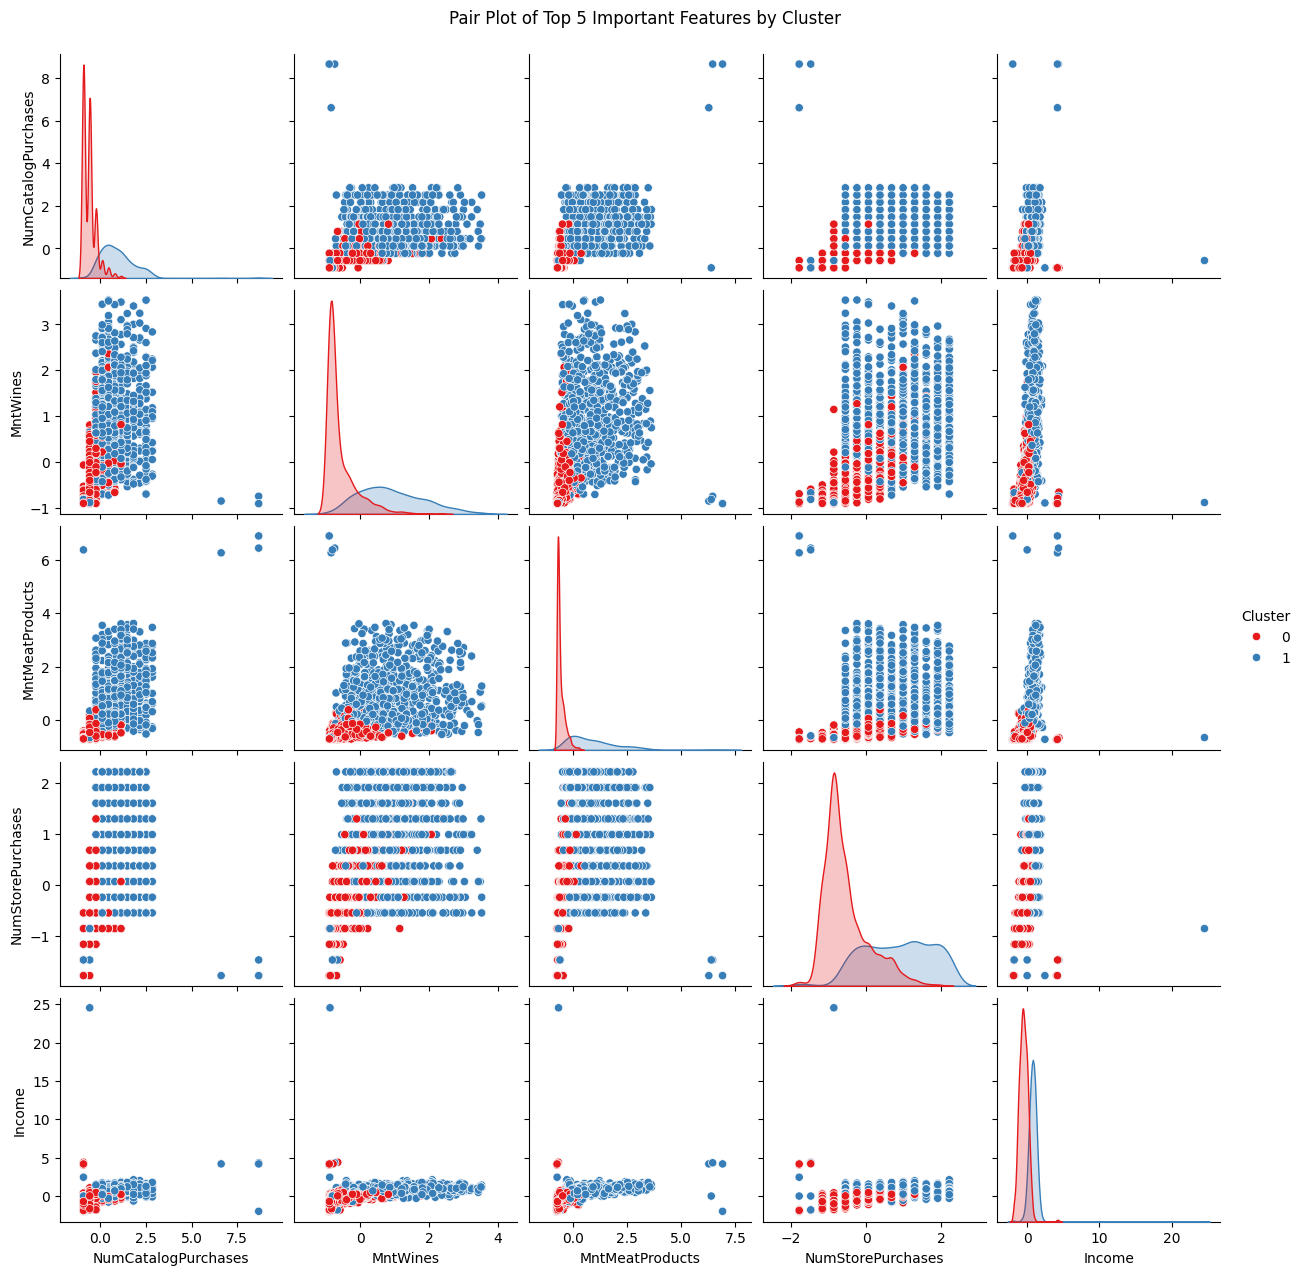

In [14]:
# Analyze the characteristics of each cluster
numerical_summary = data_combined.groupby('Cluster')[num_cols].mean()
categorical_summary = data_combined.groupby('Cluster')[cat_cols].agg(lambda x: x.mode()[0])

# Combine numerical and categorical summaries
cluster_summary = pd.concat([numerical_summary, categorical_summary], axis=1)

# Visualize the clusters
# Create a pair plot with the selected top features
sns.pairplot(data_combined, vars=top_features, hue='Cluster', palette='Set1', diag_kind='kde')

# Show the plot
plt.suptitle('Pair Plot of Top 5 Important Features by Cluster', y=1.02)
plt.show()

In [15]:
# Display cluster summary
for cluster in range(optimal_clusters):
    print(f"Cluster {cluster}:")
    print(cluster_summary.loc[cluster])
    print("\n")

Cluster 0:
ID                      -0.006673
Year_Birth               0.093845
Income                  -0.516499
Kidhome                  0.453795
Teenhome                 0.098514
Recency                 -0.008472
MntWines                -0.583008
MntFruits               -0.490291
MntMeatProducts         -0.570719
MntFishProducts         -0.505118
MntSweetProducts        -0.489221
MntGoldProds            -0.404975
NumDealsPurchases        0.112078
NumWebPurchases         -0.395781
NumCatalogPurchases     -0.600147
NumStorePurchases       -0.550559
NumWebVisitsMonth        0.443141
AcceptedCmp3            -0.022734
AcceptedCmp4            -0.143967
AcceptedCmp5             -0.28014
AcceptedCmp1            -0.241141
AcceptedCmp2            -0.103726
Complain                 0.009459
Z_CostContact                 0.0
Z_Revenue                     0.0
Response                -0.154575
Education              Graduation
Marital_Status            Married
Name: 0, dtype: object


Cluster 1:
I

In [16]:
# Reverse the standardization process
data_original_scale = scaler.inverse_transform(data_scaled)
data_original_scale = pd.DataFrame(data_original_scale, columns=num_cols)

# Add the Cluster column to the original scale data
data_original_scale['Cluster'] = data_combined['Cluster']

# Summarize clusters in the original scale
numerical_summary_original = data_original_scale.groupby('Cluster').mean()
categorical_summary_original = data_combined.groupby('Cluster')[cat_cols].agg(lambda x: x.mode()[0])

# Combine numerical and categorical summaries
cluster_summary_original = pd.concat([numerical_summary_original, categorical_summary_original], axis=1)

# Display the cluster summaries in a readable format
for cluster in range(optimal_clusters):
    print(f"Cluster {cluster}:")
    print(cluster_summary_original.loc[cluster])
    print("\n")

Cluster 0:
ID                     5570.498898
Year_Birth             1969.930198
Income                 39318.15064
Kidhome                   0.688464
Teenhome                  0.559882
Recency                  48.864071
MntWines                107.740632
MntFruits                 6.806025
MntMeatProducts          38.158707
MntFishProducts           9.937546
MntSweetProducts          6.872153
MntGoldProds             22.900073
NumDealsPurchases         2.541514
NumWebPurchases           2.985305
NumCatalogPurchases       0.908156
NumStorePurchases         4.000735
NumWebVisitsMonth         6.391624
AcceptedCmp3              0.066863
AcceptedCmp4              0.036738
AcceptedCmp5                   0.0
AcceptedCmp1              0.005143
AcceptedCmp2               0.00147
Complain                  0.010287
Z_CostContact                  3.0
Z_Revenue                     11.0
Response                  0.094048
Education               Graduation
Marital_Status             Married
Name: 0, 